In [ ]:
# Displaying ONS population estimates for the new 2022 wards.

In [1]:
# Dependencies
!pip install --upgrade geopandas mapclassify

     |████████████████████████████████| 1.0 MB 10.0 MB/s 
     |████████████████████████████████| 15.4 MB 28.6 MB/s 
     |████████████████████████████████| 6.3 MB 16.9 MB/s 


In [2]:
import os

import geopandas as gpd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from google.colab import drive

Data
==


GDrive mount
--

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
project_dir = '/content/gdrive/MyDrive/WardProfiles'
oa_dir = f"{project_dir}/boundaries/oa"
ward_dir = f"{project_dir}/boundaries/2022_wards"
population_dir = f"{project_dir}/population"

# Outputs
out_dir = f"{project_dir}/population/maps"

In [ ]:
!mkdir -p "{out_dir}"

In [ ]:
!ls -lh "{oa_dir}"/*lsoa*.gpkg

-rw------- 1 root root 152K Nov  1 13:41 /content/gdrive/MyDrive/WardProfiles/boundaries/oa/lbl_lsoa11_200m.gpkg
-rw------- 1 root root 216K Nov  1 13:41 /content/gdrive/MyDrive/WardProfiles/boundaries/oa/lbl_lsoa11_20m.gpkg
-rw------- 1 root root 120K Nov  1 13:41 /content/gdrive/MyDrive/WardProfiles/boundaries/oa/lbl_lsoa11_centroids.gpkg
-rw------- 1 root root 1.5M Nov  1 13:41 /content/gdrive/MyDrive/WardProfiles/boundaries/oa/lbl_lsoa11_full.gpkg


In [ ]:
!ls -lh "{ward_dir}"/*.gpkg

-rw------- 1 root root 292K Nov  1 14:53 /content/gdrive/MyDrive/WardProfiles/boundaries/2022_wards/lbl_wd22_proposed.gpkg


In [ ]:
!ls -lh "{population_dir}" 

total 29M
-rw------- 1 root root  13K Nov 11 15:35 lbl_pop_est_2020_5ybins_all_lsoa11.csv
-rw------- 1 root root  55K Nov 11 15:35 lbl_pop_est_2020_5ybins_all_oa11.csv
-rw------- 1 root root 1.9K Nov 11 15:35 lbl_pop_est_2020_5ybins_all_wd22.csv
-rw------- 1 root root  12K Nov 11 15:35 lbl_pop_est_2020_5ybins_female_lsoa11.csv
-rw------- 1 root root  51K Nov 11 15:35 lbl_pop_est_2020_5ybins_female_oa11.csv
-rw------- 1 root root 1.8K Nov 11 15:35 lbl_pop_est_2020_5ybins_female_wd22.csv
-rw------- 1 root root  12K Nov 11 15:35 lbl_pop_est_2020_5ybins_male_lsoa11.csv
-rw------- 1 root root  50K Nov 11 15:35 lbl_pop_est_2020_5ybins_male_oa11.csv
-rw------- 1 root root 1.8K Nov 11 15:35 lbl_pop_est_2020_5ybins_male_wd22.csv
-rw------- 1 root root 4.7K Nov 11 16:07 lbl_pop_est_2020_agegroups_all_lsoa11.csv
-rw------- 1 root root  21K Nov 11 16:07 lbl_pop_est_2020_agegroups_all_oa11.csv
-rw------- 1 root root  639 Nov 11 16:07 lbl_pop_est_2020_agegroups_all_wd22.csv
-rw------- 1 root root 4.

Ward & LSOA geometry
--

In [5]:
# Ward22 geometry
wd22 = gpd.read_file(f"{ward_dir}/lbl_wd22_proposed.gpkg")
len(wd22)

19

In [6]:
# OA geometry
oa11 = gpd.read_file(f"{oa_dir}/lbl_oa11_20m.gpkg")
len(oa11)

887

Pop est at OA level
==
OA data & geometry
--


In [7]:
pe_oa = pd.read_csv(f"{population_dir}/lbl_pop_est_2020_all_oa11.csv")
print(len(pe_oa))
pe_oa.head()

887


,OA11CD,Total,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90+
0,E00016115,326,1,2,2,3,4,3,0,4,9,4,8,2,6,4,7,7,6,2,1,5,9,4,3,1,5,5,2,3,3,3,3,3,2,3,3,3,4,4,...,7,5,9,3,4,9,6,6,1,6,10,3,2,5,5,4,4,0,2,2,4,7,5,2,4,3,1,1,1,4,0,0,0,0,1,1,1,0,1,1
1,E00016136,314,4,3,1,5,5,5,2,5,4,4,6,6,8,9,7,6,4,3,2,5,1,3,5,3,5,2,3,3,2,1,2,4,1,2,3,10,5,6,...,6,4,11,5,4,4,5,2,6,3,5,2,1,3,5,5,1,2,1,2,2,2,2,3,0,3,0,0,0,0,0,0,1,3,0,1,0,0,4,2
2,E00016137,404,4,8,4,9,5,9,15,6,11,8,6,6,9,8,13,8,7,3,6,4,5,6,4,5,7,3,4,4,3,3,4,6,4,4,5,6,6,4,...,4,7,6,5,5,8,1,6,5,2,5,7,4,1,2,3,1,2,2,1,1,1,2,0,2,2,2,3,2,1,1,0,1,0,3,0,0,1,0,0
3,E00016138,295,2,7,4,6,6,7,3,6,2,7,7,4,4,5,5,6,4,4,6,4,3,3,4,4,2,3,2,1,2,2,3,4,5,7,8,4,5,6,...,5,2,5,4,3,5,7,4,5,3,3,2,1,0,2,2,2,1,2,1,4,1,1,1,0,2,0,1,0,1,0,0,0,1,0,0,0,0,1,3
4,E00016139,352,5,7,1,9,2,9,7,5,11,8,3,8,10,8,4,7,5,7,5,4,4,4,1,5,5,4,4,4,2,3,4,2,5,5,4,4,6,6,...,7,5,5,9,2,1,8,4,4,7,4,3,4,2,6,1,0,2,1,0,1,2,3,5,0,0,1,2,0,0,2,2,0,0,0,0,0,0,0,0


In [8]:
pe_oa_geom = oa11.merge(pe_oa[['OA11CD', 'Total']], on='OA11CD')
print(len(pe_oa_geom))
pe_oa_geom.columns

887


Index(['OBJECTID', 'OA11CD', 'LAD11CD', 'Shape__Are', 'Shape__Len', 'geometry',
       'Total'],
      dtype='object')

Map
--

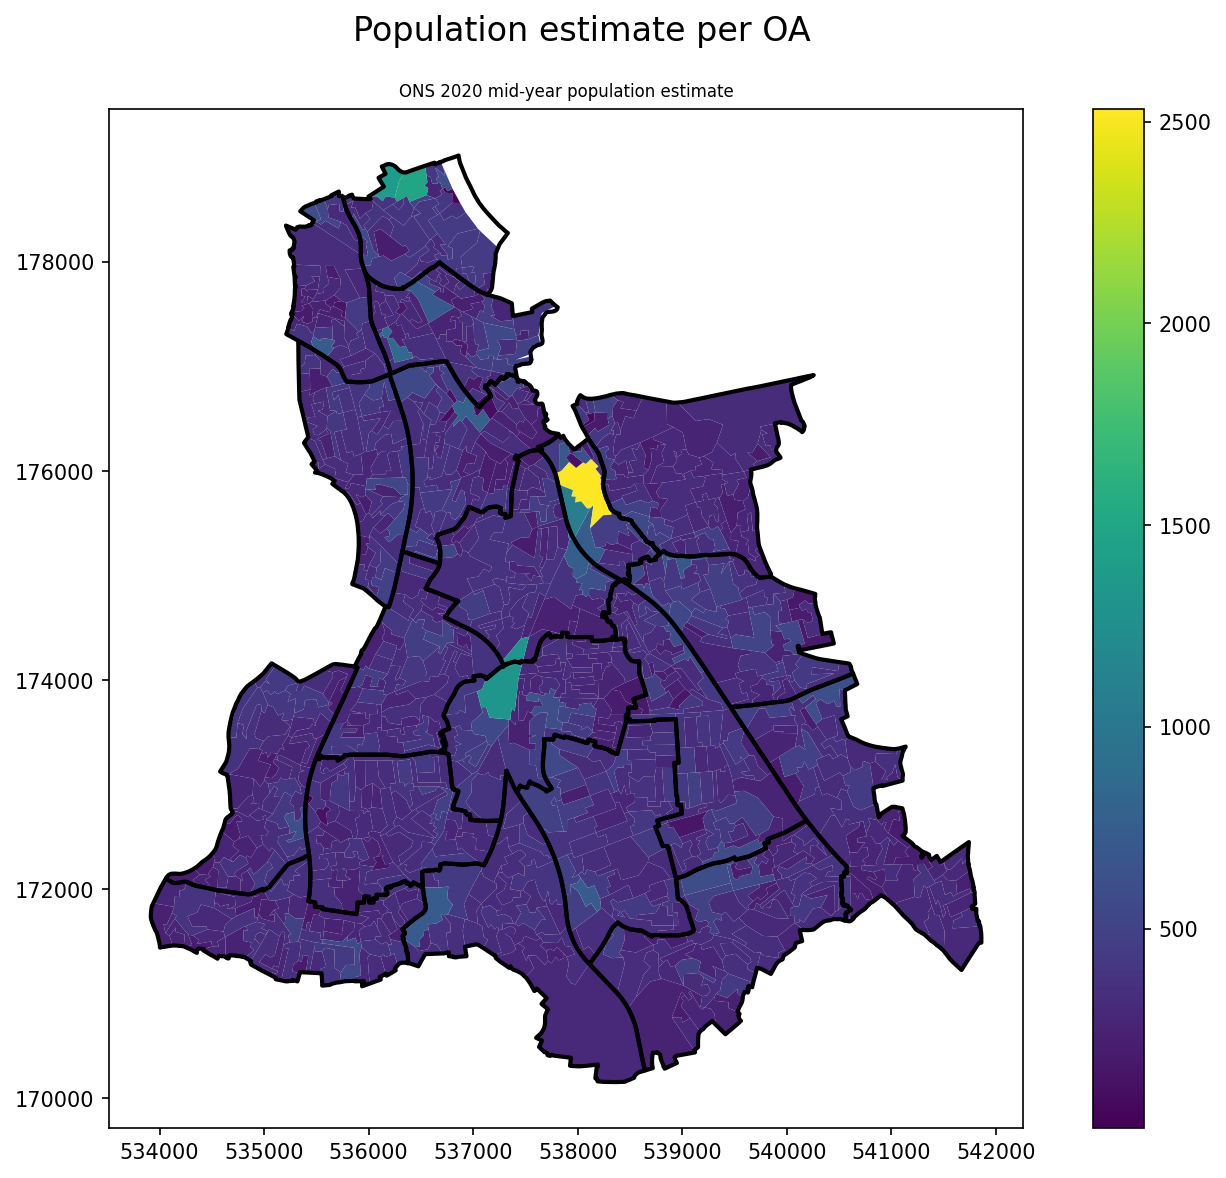

In [9]:
# First the raw data

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 9), dpi=150)
plt.suptitle('Population estimate per OA', fontsize=16, y=.95)
plt.title('ONS 2020 mid-year population estimate', fontsize=8)
pe_oa_geom.plot(ax=ax, column='Total', 
              legend=True) 
#oa11.plot(ax=ax, facecolor='none', linewidth=0.5, edgecolor='black')
wd22.plot(ax=ax, facecolor='none', linewidth=2, edgecolor='black')
# plt.legend()

# plt.savefig(f"{out_dir}/lbl_oa11_wd22_pop_est_all.png", dpi=600)
# plt.savefig(f"{out_dir}/lbl_oa11_wd22_pop_est_all.pdf")

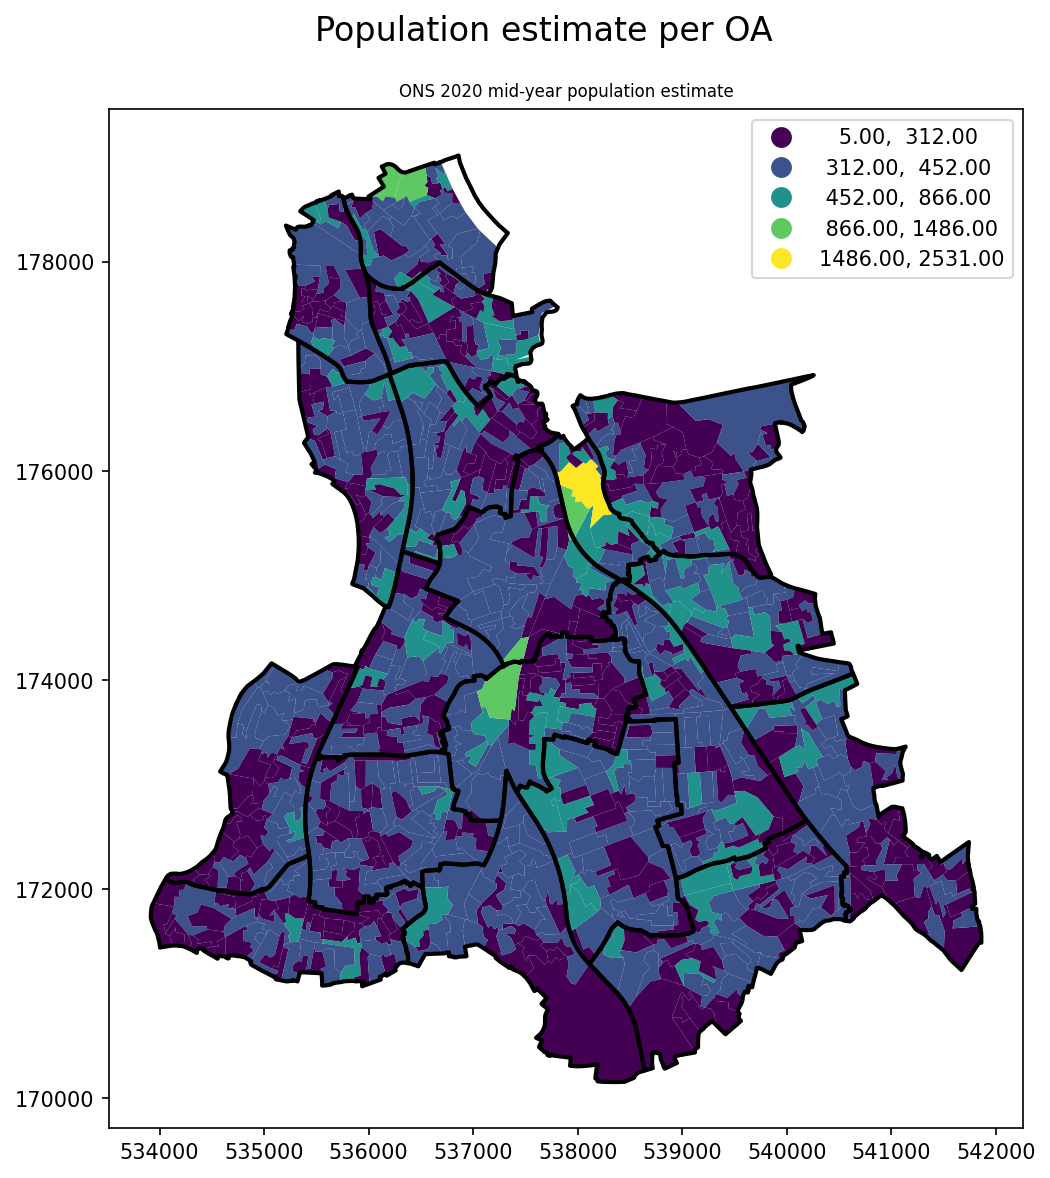

In [10]:
# To introduce a bit more visual contrast, let's try with natural breaks

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 9), dpi=150)
plt.suptitle('Population estimate per OA', fontsize=16, y=.95)
plt.title('ONS 2020 mid-year population estimate', fontsize=8)
pe_oa_geom.plot(ax=ax, column='Total', 
              legend=True,
              # mapclassify parameters for breaks
              # See https://pysal.org/mapclassify/api.html
              scheme='NaturalBreaks', 
              classification_kwds={
                 'k': 5 
              },
              # legend_kwds={
              #     'labels': bin_labels
              # }
              # legend_labels=lsoa_imd.IMD_decile
              ) 
#oa11.plot(ax=ax, facecolor='none', linewidth=0.5, edgecolor='black')
wd22.plot(ax=ax, facecolor='none', linewidth=2, edgecolor='black')
# plt.legend()

plt.savefig(f"{out_dir}/lbl_oa11_wd22_pop_est_all.png", dpi=600)
plt.savefig(f"{out_dir}/lbl_oa11_wd22_pop_est_all.pdf")

Population at Ward level
==

In [11]:
pe_wd = pd.read_csv(f"{population_dir}/lbl_pop_est_2020_5ybins_all_wd22.csv")
print(len(pe_wd))
pe_wd.columns

19


Index(['WD22CD_proposed', 'Total', '0-4', '5-9', '10-14', '15-19', '20-24',
       '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64',
       '65-69', '70-74', '75-79', '80-84', '85+'],
      dtype='object')

In [12]:
# Assign Ward names -- we can take them from the WD22 boundaries data
wd22cd_nm = wd22.set_index('WD22CD_proposed').WD22NM_proposed.to_dict()
pe_wd['WD22NM_proposed'] = pe_wd.WD22CD_proposed.map(lambda ward: wd22cd_nm[ward])
pe_wd.columns

Index(['WD22CD_proposed', 'Total', '0-4', '5-9', '10-14', '15-19', '20-24',
       '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64',
       '65-69', '70-74', '75-79', '80-84', '85+', 'WD22NM_proposed'],
      dtype='object')

In [13]:
data = pe_wd.set_index('WD22NM_proposed')[pe_wd.columns[1:-1]]

In [14]:
# Total population
data[['Total']].style.format('{:,d}')

,Total
WD22NM_proposed,
Bellingham,"11,682"
Blackheath,"17,154"
Brockley,"18,649"
Catford South,"17,462"
Crofton Park,"15,539"
Deptford,"15,617"
Downham,"18,224"
Evelyn,"14,506"
Forest Hill,"16,314"


In [15]:
data_rel = (data.divide(data['Total'], axis=0) * 100).round(1)
data_rel.head()

,Total,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+
WD22NM_proposed,,,,,,,,,,,,,,,,,,,
Bellingham,100.0,7.1,9.1,8.6,5.8,4.5,5.4,7.5,8.2,8.1,6.8,7.3,6.9,5.1,3.0,2.5,1.8,1.4,1.0
Blackheath,100.0,6.6,6.1,4.8,4.6,4.5,9.5,10.9,9.9,8.3,7.4,6.5,5.1,4.2,3.1,3.0,2.0,1.8,1.8
Brockley,100.0,6.2,5.1,3.7,4.0,10.3,13.2,13.1,10.8,7.6,6.2,5.5,4.1,3.2,2.2,1.8,1.2,1.0,0.9
Catford South,100.0,6.8,7.3,6.5,6.0,5.1,5.7,6.8,7.7,8.4,7.1,7.0,7.3,5.3,4.0,3.2,2.0,1.8,2.0
Crofton Park,100.0,7.9,7.7,4.9,3.5,3.9,7.5,10.0,11.5,10.1,7.2,6.3,5.6,4.4,3.1,2.3,1.9,1.2,1.2


In [17]:
import seaborn as sns

Text(182.08333333333331, 0.5, '')

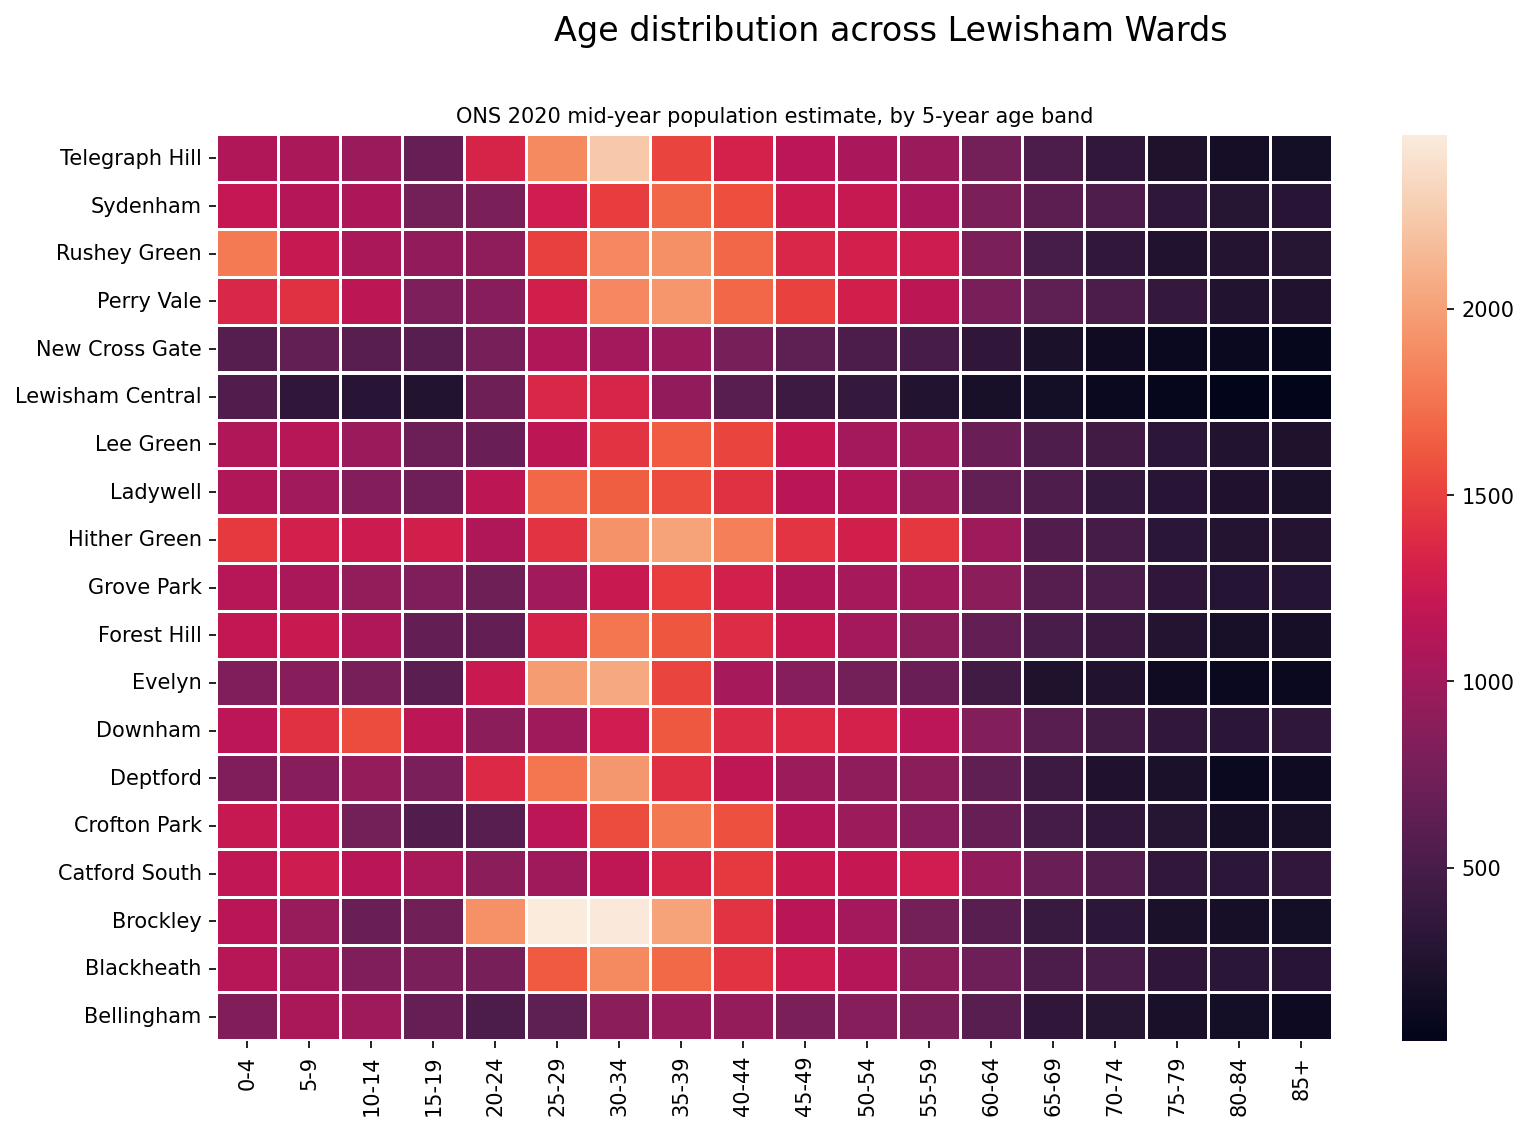

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8), dpi=150)

plt.suptitle('Age distribution across Lewisham Wards', fontsize=16)
plt.title('ONS 2020 mid-year population estimate, by 5-year age band', fontsize=10)

ward_names = list(reversed(data.index)) 
variable_names = data_rel.columns[1:] # excluding the total

sns.heatmap(data[variable_names].loc[ward_names], linewidth=1 , annot=False)
plt.xticks(rotation=90)
plt.ylabel('')